In [14]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [15]:
image = PIL.Image.open(r'lena.png')
image = np.array(image)

In [16]:
def convolve(conv_unit, kernel):
  mul = np.multiply(conv_unit, kernel)
  return np.sum(np.sum(mul, axis=0))

In [17]:
def make_convolution_matrix(image_padding, kernel_shape):
  #separate 3 channels of the image (has be padded)
  lst_channels = [image_padding[:,:,i] for i in range(image_padding.shape[-1])]
  #make list of convolution matrix for every channel matrix:
  lst_conv_channels = []
  for channel in lst_channels:
    conv_shape_channel = tuple(np.subtract(channel.shape, kernel_shape) + 1) + kernel_shape
    strides = channel.strides + channel.strides
    sub_matrices = np.lib.stride_tricks.as_strided(channel, conv_shape_channel, strides)

    #list of sub matrices of 3 channels
    lst_conv_channels.append(sub_matrices) 
  return lst_conv_channels

In [18]:
def convolution(image, stride=1, padding=1, method='Box Blur'):
  #prepare kernel for convolution (box blur method)
  if method == 'Box Blur':
    kernel = np.ones((3,3))/9
  if method == 'Gaussian Blur':
    kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
  kernel_shape = kernel.shape
  image_shape = image.shape

  image_heigh = image.shape[0]
  image_width = image.shape[1]

  #padding the image
  image = np.pad(image, ((1,1), (1,1), (0,0)))
  #concast the data type
  image = image.astype(np.double)
  #make convolution matrix of image.
  lst_conv_channels = make_convolution_matrix(image, kernel_shape)
  #computing convolution.
  feature_map = []
  for conv_channel in lst_conv_channels:
    lst_conv_result = []
    for i_row in range(conv_channel.shape[0]):
      for i_col in range(conv_channel.shape[1]):
        lst_conv_result.append(convolve(conv_channel[i_row, i_col], kernel))
    lst_conv_result = np.array(lst_conv_result).reshape((image_heigh, image_width))
    feature_map.append(lst_conv_result)
  #feature_map = np.array(feature_map)
  return np.dstack(feature_map)

In [19]:
def blurring_image(image_name, method='Box Blur'):
  image = PIL.Image.open(image_name)
  image = np.array(image)
  result = convolution(image, method)
  result = result.astype(np.uint8)
  return result

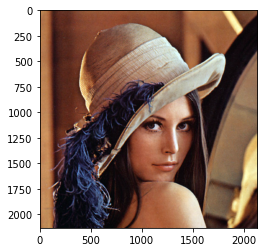

In [20]:
lena_blurring = blurring_image(r"lena.png", method='Gaussian Blur')
plt.imshow(lena_blurring)

In [21]:
def grayscale_image(image_name):
  image = PIL.Image.open(image_name)
  image = np.array(image)
  R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
  gray_image = 0.2989 * R + 0.5870 * G + 0.1140 * B
  gray_image = np.dstack([gray_image,gray_image,gray_image]).astype(np.uint8)
  return gray_image

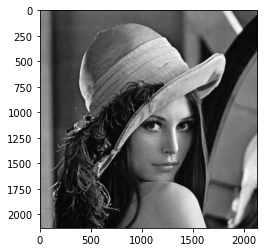

In [22]:
lena_gray = grayscale_image("lena.png")
plt.imshow(lena_gray)

In [10]:
def change_constrast(image_name, constrast_lv=1):
  image = PIL.Image.open(image_name)
  image = np.array(image).astype(float)
  image *= float(constrast_lv)
  image = np.clip(image, 0, 255).astype(np.uint8)
  return image

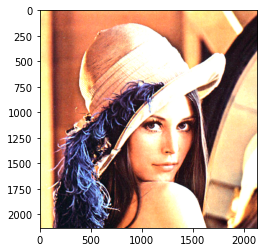

In [11]:
lena_constrast = change_constrast("lena.png", 2)
plt.imshow(lena_constrast)

In [12]:
def change_brightness(image_name, brightness_lv=0):
  image = PIL.Image.open(image_name)
  image = np.array(image).astype(float)
  image += float(brightness_lv)
  image = np.clip(image, 0, 255).astype(np.uint8)
  return image

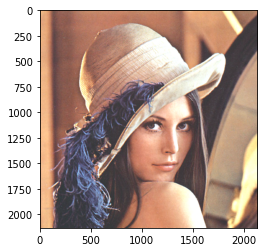

In [13]:
lena_brightness = change_brightness("lena.png", 50)
plt.imshow(lena_brightness)

In [363]:
def blend_2_gray_image(image_name_01, image_name_02):
  img_gray_01 = grayscale_image(image_name_01)
  img_gray_02 = grayscale_image(image_name_02)
  combination = 0.5*img_gray_01 + 0.5*img_gray_02
  combination = combination.astype(np.uint8)
  return combination

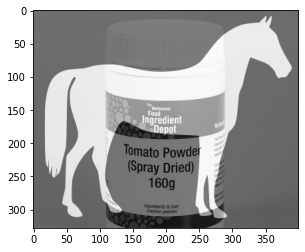

In [364]:
blend = blend_2_gray_image("drugs.jpg", "horse.png")
plt.imshow(blend)

In [4]:
def rotate_image(image_name, method='horizontal'):
  image = PIL.Image.open(image_name)
  if method == 'horizontal':
    return np.flip(image, axis=1)
  if method == 'vertical':
    return np.flip(image, axis=0)

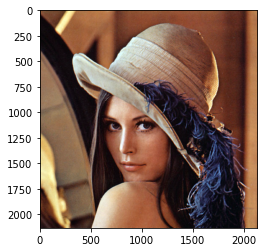

In [8]:
lena_horizontal = rotate_image("lena.png", method='horizontal')
plt.imshow(lena_horizontal)

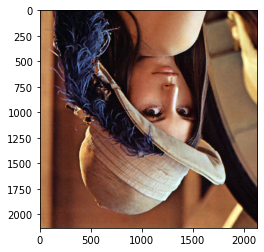

In [9]:
lena_vertical = rotate_image("lena.png", method='vertical')
plt.imshow(lena_vertical)